# Ultimate Take-Home Challenge



## Part 1 - Exploratory Data Analysis

Here we are exploring some login data for users. We will be aggregating by 15 minute intervals and doing some exploratory data analysis to understand user behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('logins.json')
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
#Check for NaN values just in case
df.isna().sum()

login_time    0
dtype: int64

In [4]:
# Sort by the time to make sure it's sequential ( not necessary but makes it easier to sanity check )
# Create a login column so we can sum the number of logins
df = df.sort_values(by = 'login_time')
df['login'] = 1
df.head()

,login_time,login
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1


In [5]:
# Group by 15 minute intervals and sum on login
df_grouped = df.groupby(pd.Grouper(key = 'login_time',freq = '15Min')).sum()
df_grouped.head()

,login
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


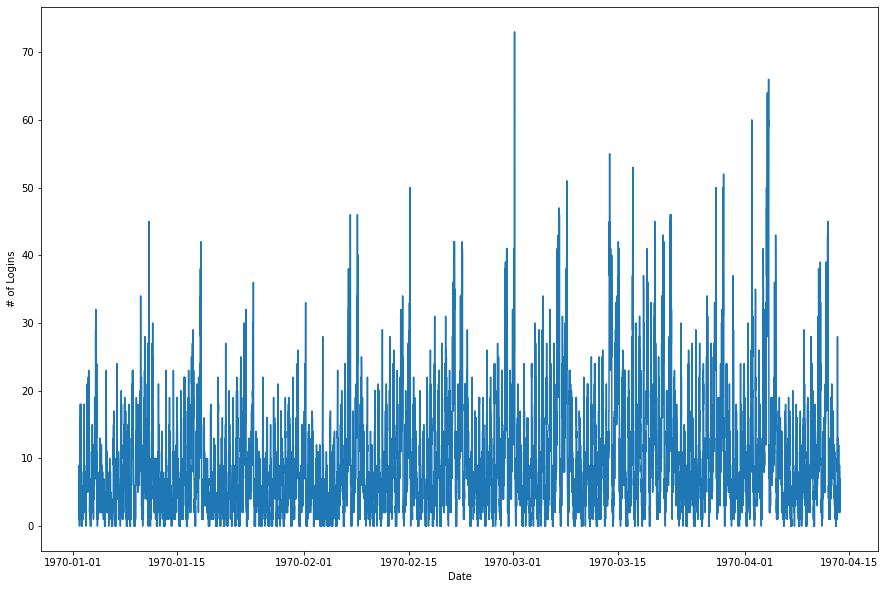

In [6]:
#Look at the initial plot 
#Kind of messy with so many data points, lets look closer

fig = plt.figure(figsize=(15,10))
plt.plot(df_grouped)
plt.xlabel('Date')
plt.ylabel('# of Logins');

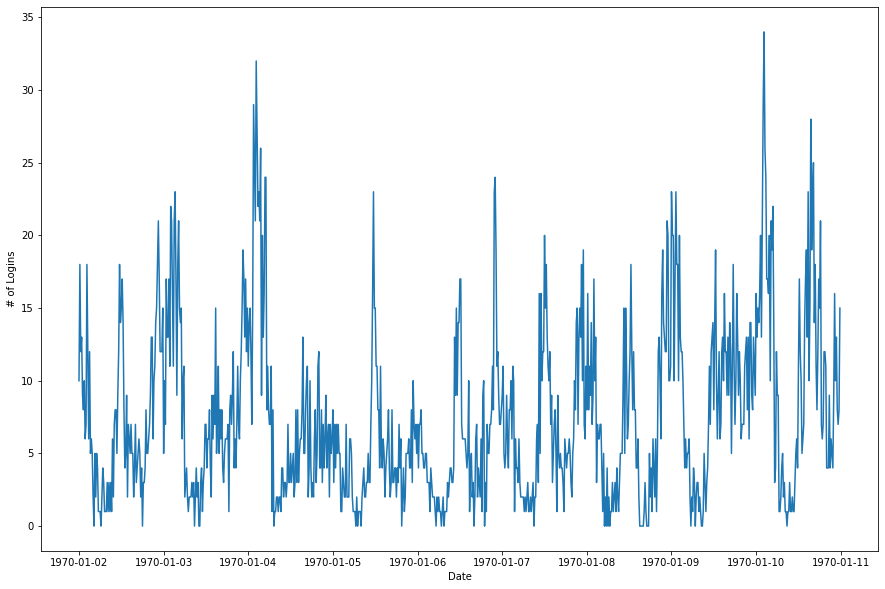

In [7]:
# Lets zoom in on a particular week
df_sub = df_grouped['1970-01-02':'1970-01-10']

fig = plt.figure(figsize=(15,10))
plt.plot(df_sub)
plt.xlabel('Date')
plt.ylabel('# of Logins');

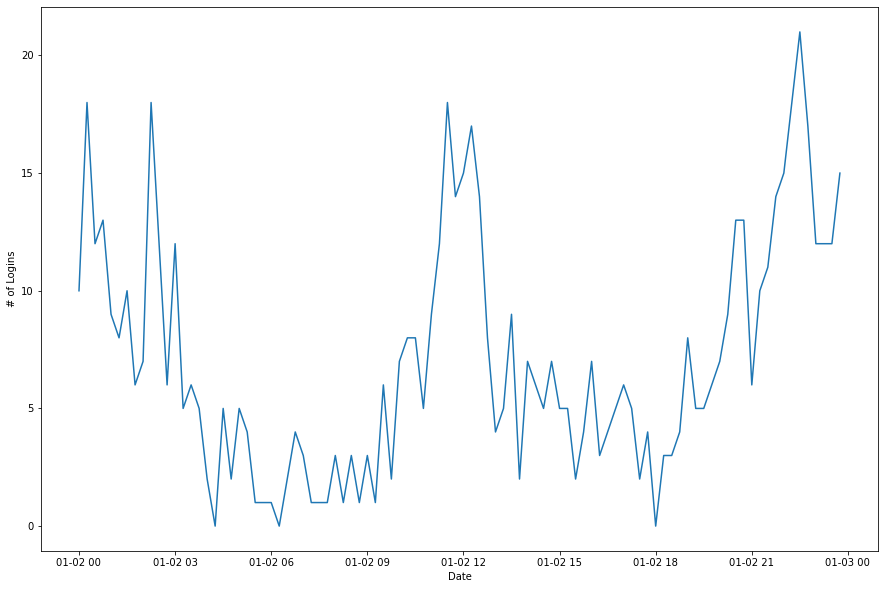

In [8]:
# Lets zoom in on a singular day, we'll use the January 2nd as it is the first full day's worth of data we have

df_sub = df_grouped.loc['1970-01-02']

fig = plt.figure(figsize=(15,10))
plt.plot(df_sub)
plt.xlabel('Date')
plt.ylabel('# of Logins');

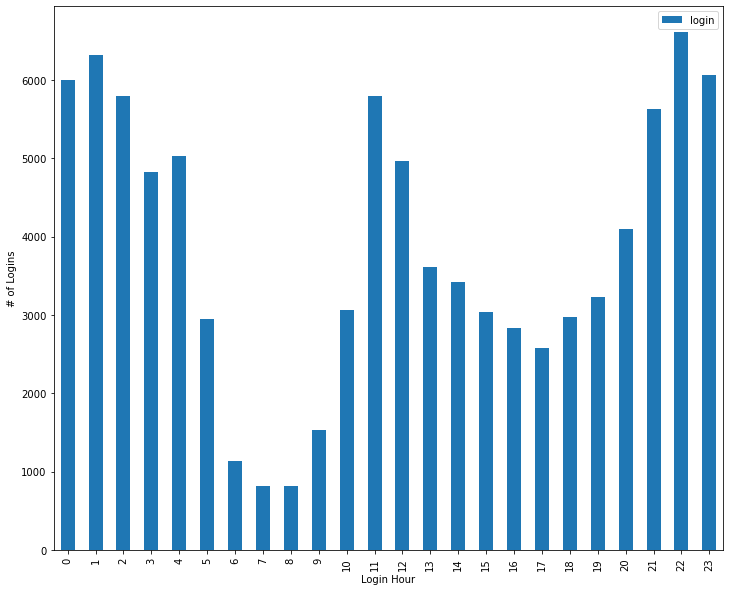

In [9]:
#Resample by the hours, group, and sum to create a bar plot 
hours = df_grouped.resample('H').sum()
hours_grouped = hours.groupby(hours.index.hour).sum()

hours_grouped.plot(kind = 'bar', figsize = (12,10), xlabel = 'Login Hour', ylabel = '# of Logins');

## Part 1 Thoughts

It would seem the logins are very cyclical.

We see demand mostly fluctuating on a daily period. We see log-ins increasing at 12PM and 12AM. With it decreasing at all other hours. We can see this when we plot out login data for a 24 hour period. Along a weekly and monthly basis there are some cyclical trends but mostly following our day-to-day trends. We see increases of usage during parts of the week and decreases during other parts of the week. Potentially due to work-week cycles or other weekly events. 

If we plot the data out on a bar graph we can see some sort of pattern here. We see that the lowest hours of login will be from the hours of 6-9AM with a second trough at 1PM-7PM. We see peak log-in at 11AM-12PM as well as 9PM-2AM.

## Part 2 - Experiment and Metrics Design

We are looking to answer the question of how to promote the usage of a toll road between two cities by driver partners through reimbursement of toll costs. 
Driver partners are those who use their personal vehicles under contract with a company for transportation services. 

The cities have slightly different activity patterns: during the weekday Gotham (city one) is active at night and Metropolis (city two) is active during the day, with the weekends being fairly active the whole time.

In this summary, I hope to answer the following questions:
1) What is considered a key measure of success and why?

2) Describe a practical experiment to compare the effectiveness of the proposed change including implementation, statistical tests, and results metrics.


### Part 2.1 - Measure of Success

I would consider the program successful if we see a significant increase in the amount of driver partners serving both cities. For instance, during the weekday, I would expect to see a significant increase of driver partners coming from Gotham to Metropolis during the day and vice versa at night. During the weekend, I would expect to see an overall increase in the driver partners going to both cities based on need for each city.

I would definite a significant increase based on a statistical measure such as a t-test but a good target I think would be a 10% increase to start for each component. 

My reasoning for an increase in Gotham to Metropolis during weekday daytime is because there is more activity in Metropolis and thus it makes sense for Gotham drivers to cross over. The same is true during weekday nights with Gotham being more active then I would expect Metropolis drivers to cross the toll bridge over. With reasonable activity throughout the day on weekends, I would expect drivers to drive back and forth across the toll bridge and accepting fairs which would lead them to cross the toll bridge. 

It could also be cheaper for consumers to take driver partners due to the fact that toll fairs are covered.

### Part 2.2 - Experimental Design

#### (a)  Implementation
First, I would study the baseline activity without the program. I would collect historical data regarding driver partners and how frequently they cross the toll bridge. Then, after I implemented the program, I would collect data regarding driver partners crossing the toll bridge. I would focus on three groups: (1) Daytime crossing, (2) Evening crossing, and (3) Weekend crossing. I think it would also be good to collect data regarding directionality. Metropolis drivers going to Gotham and vice-versa.

#### (b) Statistical Testing
After data collection, I would perform a T-test analysis to compare each of the time-based groups before and after the crossing to see if there were any significant factors. That would be a good first-look at if there were any significant differences at all just by implementing the program.

Then, I would use an ANOVA in order to glean insight in directionality. I would like to see whether drivers would cross based on activity or if that does not matter. For instance, could we see if there are more daytime Gotham crossings from Gotham to Metropolis and then more nighttime crossings from Metropolis to Gotham during the weekday and what is the difference during the weekend.

#### (c) Results and Caveats
If there were statistically significant results then I would say that there was an impact being made by the program. I would present that information with bargraphs and visual aids to show the differences before and after the toll road reimbursement. I would add the caveat that just because the change is statistically significant we should dig deeper and see if there was an significant real-world impact. If the drivers are pretty exclusive than maybe there's a significant difference just because there *is* movement but the real-world significance is not impactful enough to justify the continuation of the program.

I would encourage further study and monitoring as the program continues. I would also consider looking into other factors that may have lead to the increase in driver partners crossing and not just the toll road reimbursement program.

## Part 3 - Predictive Modeling

In [10]:
df = pd.read_json('ultimate_data_challenge.json')
df.head(8)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0


In [11]:
# Lets change the True/False to 1/0
#This prevents further issues down the line

df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9


In [12]:
#lets investigate the phones
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [13]:
#Since there are only two groups, we can create a category that is called 'Android' 
#This way we can do a quick dummy encoding and allow the variable to be used in future models

df['Android'] = 0
df.loc[df['phone'] == 'Android', 'Android'] = 1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Android
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,1


In [14]:
# Now we drop the phone and we know that if there is a 1 it's Android and if it's a 0 it's iPhone
df.drop('phone', axis = 1,inplace = True)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Android
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1


In [15]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Android
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,0.37708,60.926084,5.796827,4.778158,0.300440
std,3.792684,0.617338,0.222336,19.958811,0.48466,37.081503,5.707357,0.446652,0.458454
min,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000


In [16]:
df.shape

(50000, 12)

### Part 3.1 - General EDA

We'll take a look at some plots and get an idea of our demographic overall

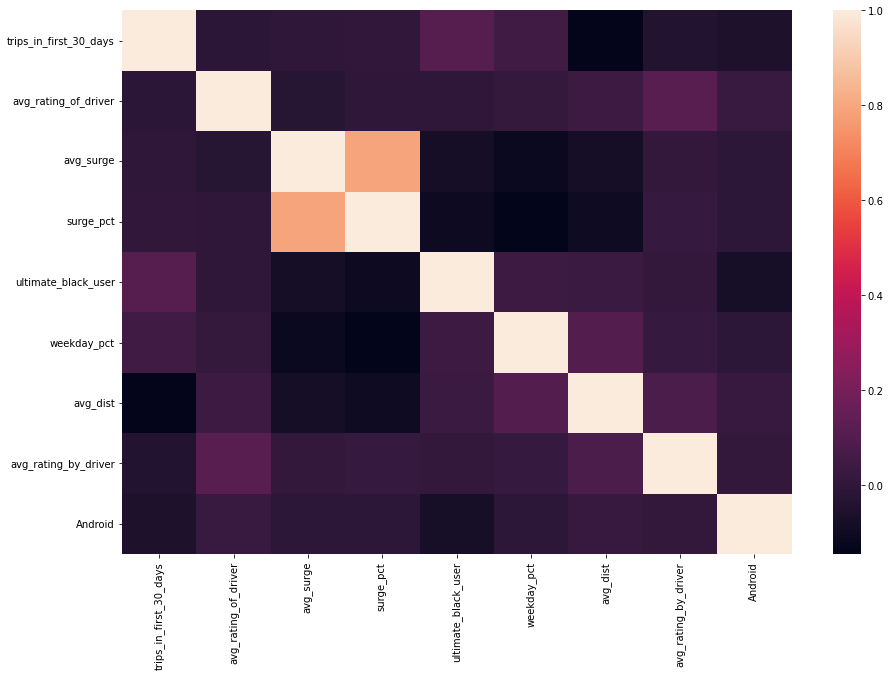

In [17]:
#Lets see if there are any immediate correlations that jump out to us in a heatmap

fig = plt.figure(figsize = (15,10))
sns.heatmap(df.corr());

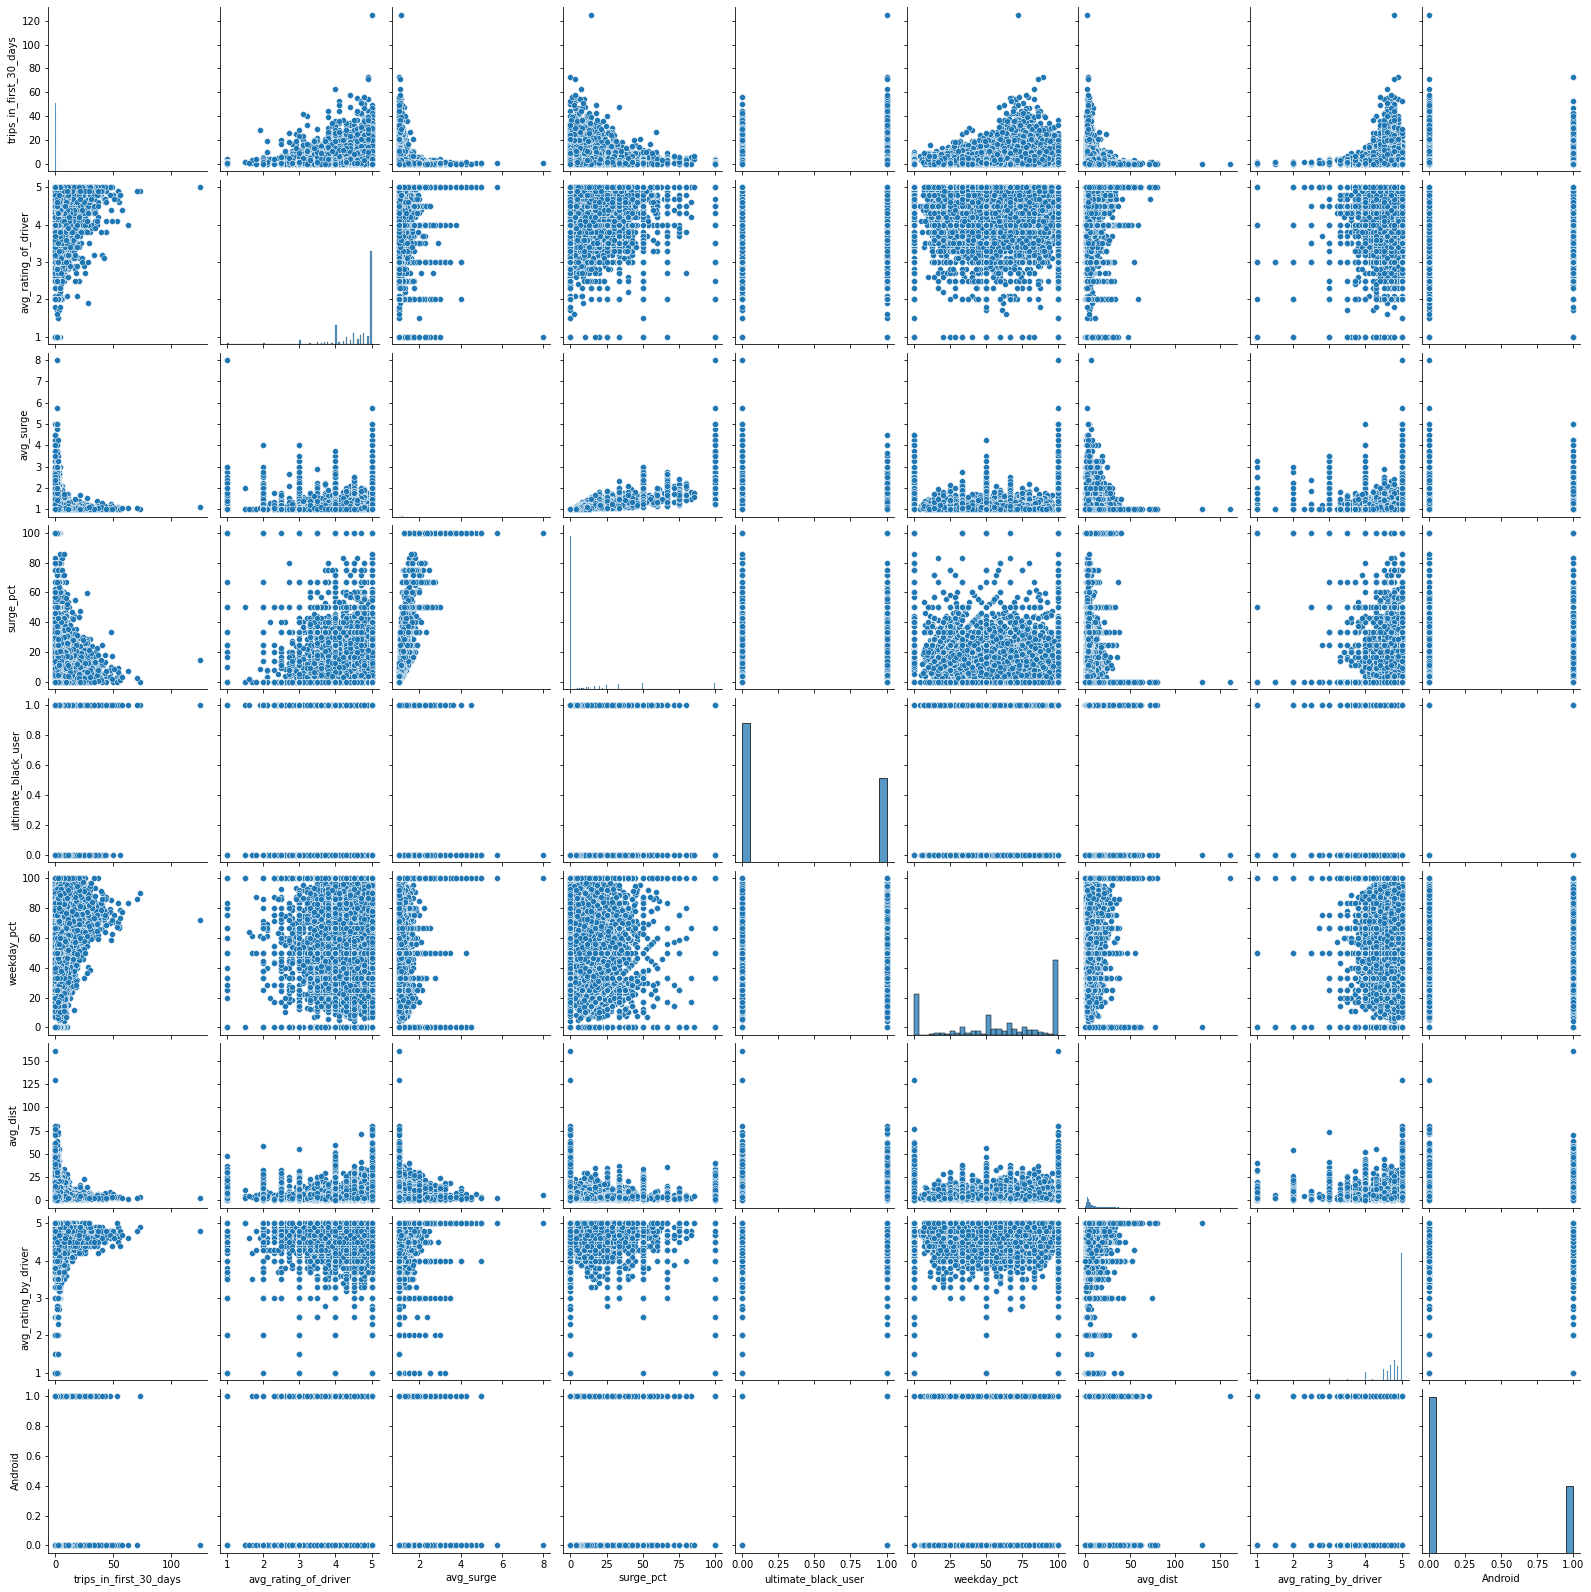

In [18]:
#Let see if we can get any relationships

sns.pairplot(df)

In [19]:
#Date this data was pulled we will use this as our marker for 30 days preceding
df['last_trip_date'].max()

'2014-07-01'

In [20]:
# Lets create a target variable called "retained" for if someone was active in the 30 days prior
#We'll say 30 days prior is 2014-06-01
df['retained'] = 0
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Android,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0


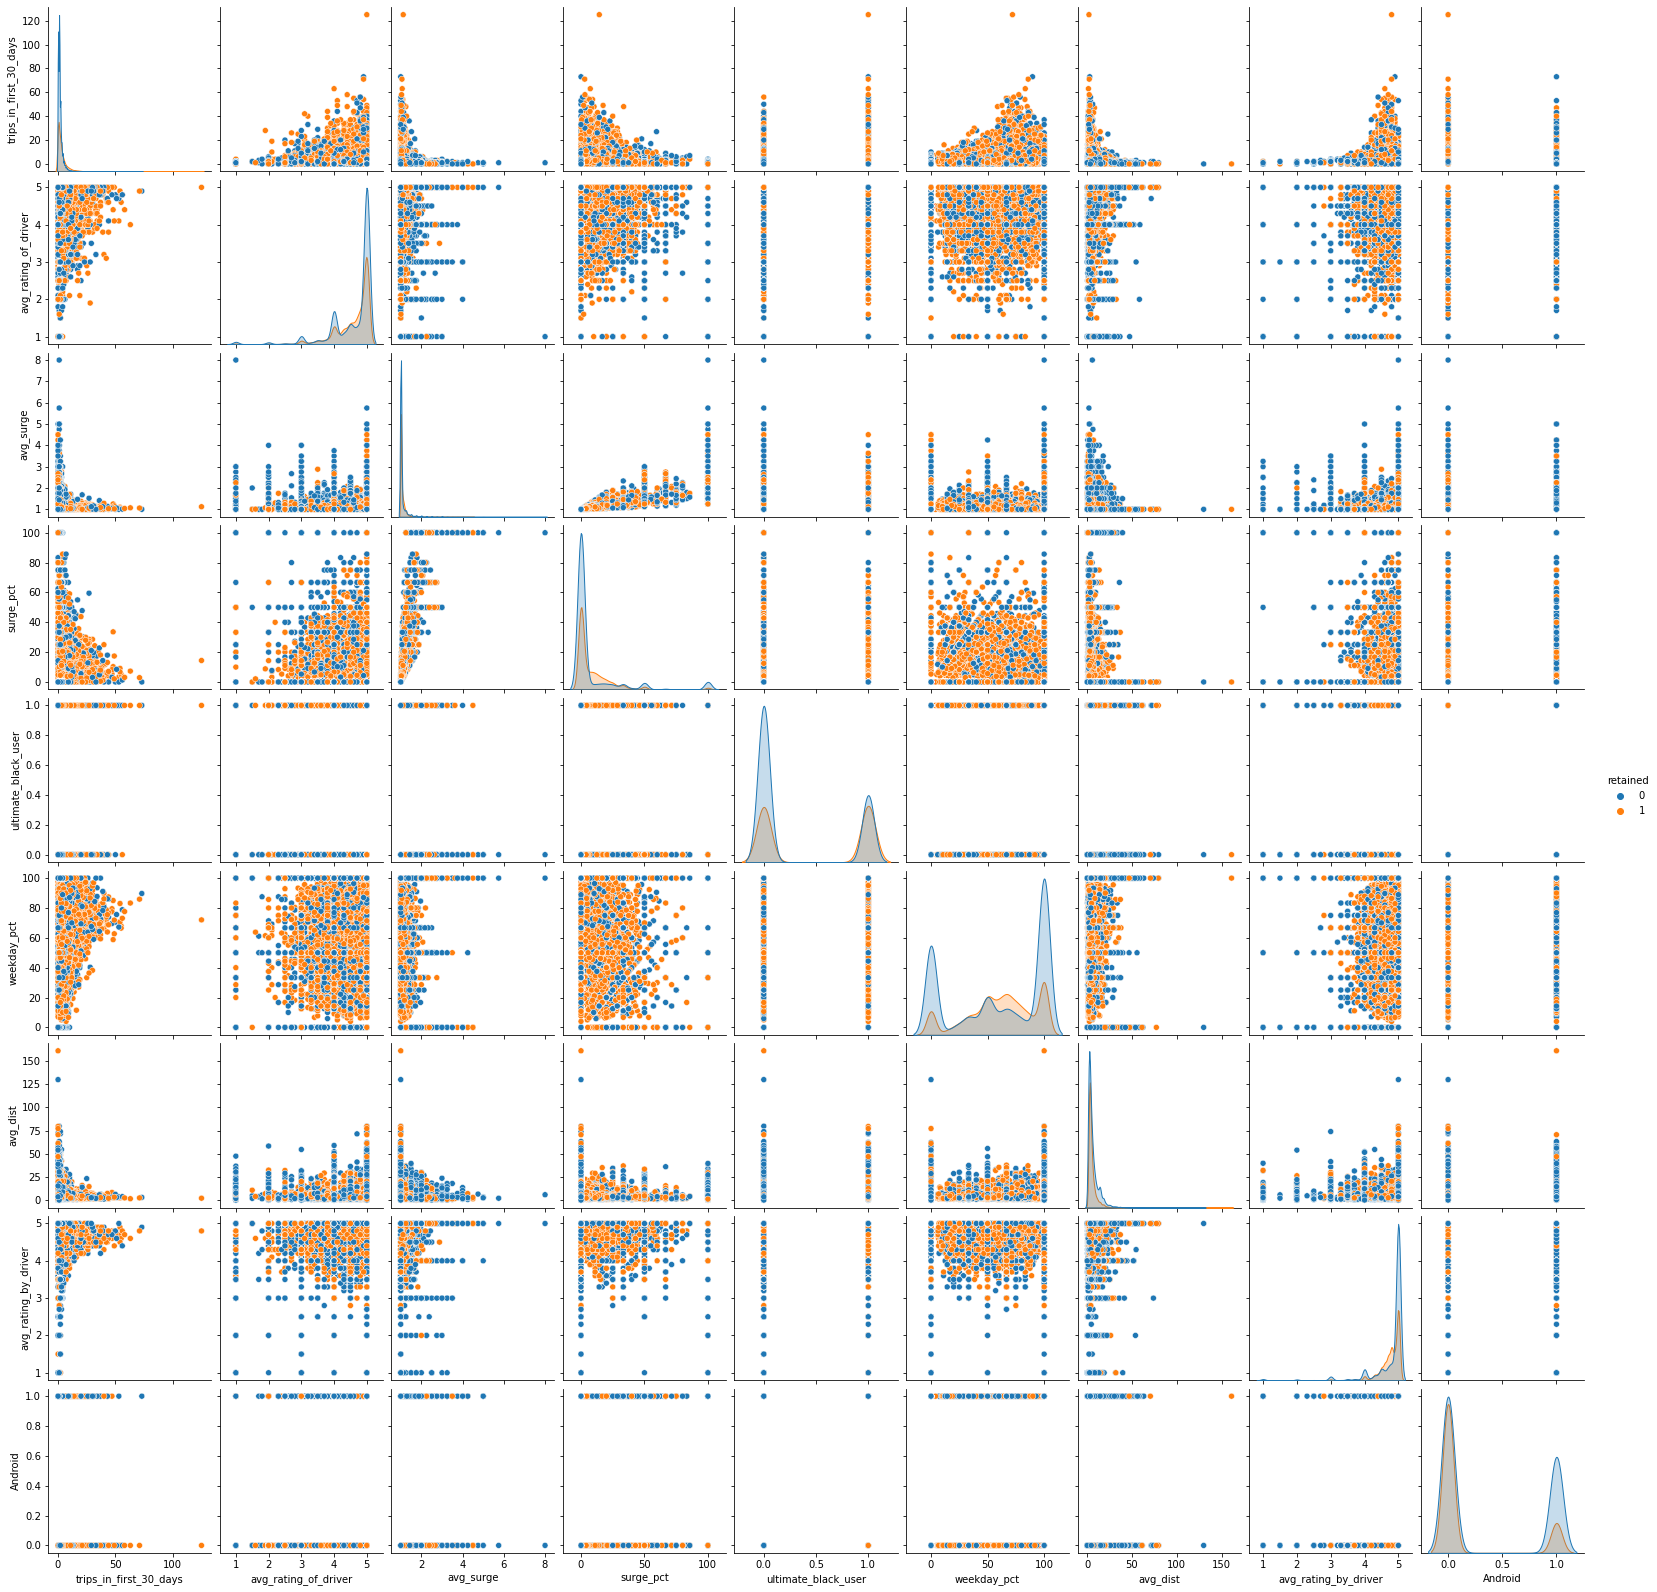

In [21]:
# Now we can explore the pairplot again using retained as a dividing factor
sns.pairplot(df, hue = 'retained')

In [22]:
#Percentage of retained is the number of true retained/size of the dataset
round(df['retained'].sum()/df.shape[0] * 100,2)

37.61

From first glance looking at some generic plots and splitting out the data, it seems like the 2 groups are pretty similar. Nothing stands out to me as separating one group from another. We made sure to convert our binary traits `ultimate_black_user` and `phone` into numerical values so that our model and our plotting can use them for separation and for future modeling


We see that roughly 37.61% of all users were retained if we count active users as the preceding days from the last day on this dataset. The last day of this data set is July 1st so we are counting every user from June 1st to July 1st as "active" due to their activity in the last 30 days.

### Part 3.2 Modeling

We will try a models that I like to use for classification purposes. We will use XGBoost to see how the decision tree decides to classify between these two groups by giving it the target of our retention group.

This could give us some quick insights into our binary classification. Due to hte lack of cleanly separable groups, I would prefer to use XGBoost which handles Logistic Regression-like problems really well. I also like XGBoost for the potential to understand the output of the model.

We will drop the `city`, `signup_date`, and `last_trip_date` from our data due to not needing it for the model.

In [23]:
df.drop(['city','signup_date','last_trip_date'], axis = 1, inplace = True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

#Select our variables
X = df.drop(['retained'], axis = 1)

#Orindally encode our categories since XGBoost does not like categorical variables
y = df[['retained']]

#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [25]:
#Enable classifier with default
xgbr = xgb.XGBClassifier()

#fit the model
xgbr.fit(X_train, y_train)

#predict with model
y_pred = xgbr.predict(X_test)

In [26]:
#Lets look at our metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      9300
           1       0.72      0.60      0.65      5700

    accuracy                           0.76     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.76      0.75     15000



In [27]:
#Lets improve and optimize a little bit
#Try to improve using Bayesian Optimization
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

#Convert the dataframe to DMatrix for optimization and speed
dtrain = xgb.DMatrix(X_train, y_train)

#Define the function that will be used
#Set the paramters you wish to change as inputs to function
#Then define the metric you would like to use to optimize the model with

def bo_tune_xgb(max_depth, gamma, n_estimators, learning_rate):
        params = {'max_depth': int(max_depth),
                 'gamma': gamma,
                 'learning_rate': learning_rate,
                 'subsample':0.8,
                 'eta':0.1,
                 }
        #We are using the result of a cross-validation RMSE in order to gauge the model performance
        cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
        return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [28]:
#Create the Bayesian Optimization object by setting the range of values we'd like to test 
xgb_bo = BayesianOptimization(bo_tune_xgb, 
                             {'max_depth': (3,10),
                             'gamma':(0,1),
                             'n_estimators': (100,120),
                             'learning_rate':(0,1)
                             })

In [29]:
#Run the optimization and try to find a model with the lowest RMSE

xgb_bo.maximize(n_iter = 5, init_points = 8, acq = 'ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.4132   |  0.0438   |  0.5938   |  5.295    |  101.1    |
|  2        | -0.4446   |  0.6537   |  0.8757   |  7.627    |  118.8    |
|  3        | -0.4139   |  0.4349   |  0.01747  |  7.027    |  112.0    |
|  4        | -0.4134   |  0.8341   |  0.4163   |  9.68     |  100.1    |
|  5        | -0.4069   |  0.09476  |  0.4578   |  5.385    |  105.7    |
|  6        | -0.4716   |  0.4186   |  0.9104   |  8.719    |  109.1    |
|  7        | -0.4254   |  0.8686   |  0.786    |  7.514    |  110.7    |
|  8        | -0.4082   |  0.7968   |  0.5065   |  6.265    |  110.8    |
|  9        | -0.4078   |  0.07973  |  0.4614   |  5.192    |  104.3    |
|  10       | -0.4179   |  1.0      |  0.9162   |  5.09     |  111.7    |
|  11       | -0.4016   |  0.1072   |  0.1884   |  3.914    |  105.4    |
|  12       | -0.5      |  1.0      | 

In [30]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

{'gamma': 0.027803247030564013, 'learning_rate': 0.31944035799778, 'max_depth': 4.530547392388911, 'n_estimators': 105.16272633001626}


In [31]:
#Initialize an XGBClassifier with the tuned parameters and fit the training data
xgbr2 = xgb.XGBClassifier(**params)
xgbr2.fit(X_train, y_train)

#predicting for training set
y_pred = xgbr2.predict(X_test)

#Looking at the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      9300
           1       0.73      0.60      0.66      5700

    accuracy                           0.76     15000
   macro avg       0.76      0.73      0.74     15000
weighted avg       0.76      0.76      0.76     15000



We see an increase in our precision and recall!

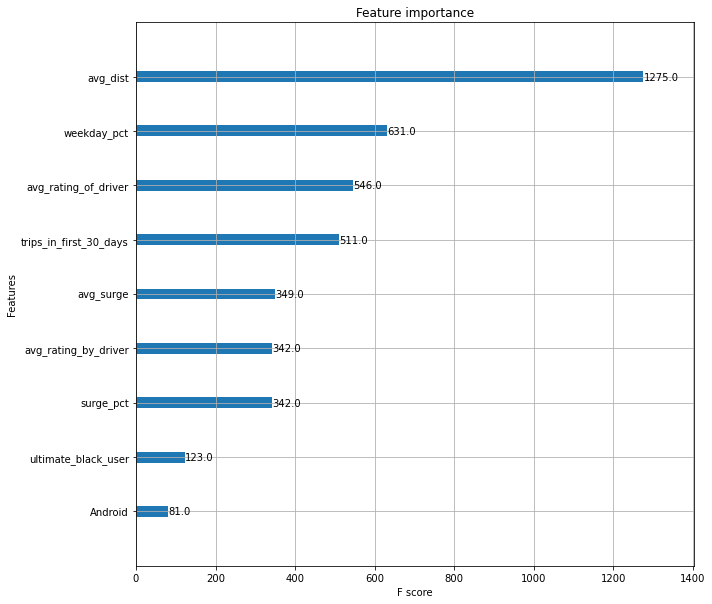

In [32]:
#Lets look at the most important features to our tree and categorizing as Class 1 -> retained

ax = xgb.plot_importance(xgbr);
fig = ax.figure
fig.set_size_inches(10,10)

Overall, I like our model but the recall in the retained group is only somewhat beter than chance. I think that the model is decent but could be improved upon. I think that perhaps not including the `surge_pct` and `avg_surge` aspects of our data we can get better classification. Without more domain knowledge, I am hesistant to remove columns without a good reason. For instance, we removed some columns earlier due to their incompatibility with the model.

### 3.3 Insights and Rider Retention

Based on the XGBoost model, we can see that `avg_dist`, `weekday_pct`, and `trips_in_first_30_days`  are our top 3 features for understanding the decisions made by the model.

My interpretation of this is that for riders with a higher average distance, we can see better retention rates. Meaning those who use Ultimate for longer rides tended to continue to use Ultimate. We also see that the weekday percentage of rides matters to the model. We can perhaps dig into this further and look at whether a higher or lower weekday percentage means more usage, my intuition would be a higher weekday percentage leads to higher retention. Perhaps these are users who use Ultimate for commuting or for running errands. Lastly, we see the the model weights the amount of trips taken in the first 30 days of a user's sign-up. My assumption is that users with more trips in their first 30 days are more likely to continue to use Ultimate.

All that said, I would recommend Ultimate really focus on users who go on longer rides, use it more frequently on the weekdays, and really capitalize on early retention with high-frequency sign-up users.